## Examples for using prunito

In [1]:
import prunito
prunito.__version__

'0.94.2'

### Searching and parsing UniProtKB data

Prunito allows searching uniprot.org and parsing entries in flat file (text) format. First, import the relevant package:

In [2]:
from prunito import uniprot as up

A simple search for all reviewed UniProtKB entries with 'tax' in their names.

In [3]:
result = up.search_reviewed('name:tax')

Check how many hits this search retrieved.

In [4]:
result.size()
# or
#len(result)

41

What would happen if a given query had many hits? By default, the maximum number of hits retrieved is 2000. This can be changed using the parameter 'limit'.

Let's re-run the previous search but this time not just for reviewed (i.e. Swiss-Prot) entries but all of UniProtKB:

In [5]:
huge = up.search('name:tax', limit=1000)

Partial dataset retrieved. Size: 1890. Retrieved: 1000.
Consider increasing the limit and/or using offset.


If the set limit is lower than the actual number of search hits, the above hint is printed.

In [6]:
# Approach 1: increase the limit of allowed hits
new_limit = up.search('name:tax', limit=2000)
new_limit.size()
#

1890

Back to the initial result, the one with size of 41. What does 41 mean? UniProtKB entries. And these entries we would like to parse. As prunito provides functionality for both searching and parsing UniProt, one can directly iterate over the entries in a search result for convenience:

In [7]:
entries = list(result)
# or
# for entry in result: ...

Iterate over the 41 entries, printing out primary accessions and recommended full names. Both fields are provided for convenience (unlike Biopython's Record object which does not have this).

In [8]:
for entry in entries:
    print(entry.primary_accession, entry.recommended_full_name)

Q06507 Cyclic AMP-dependent transcription factor ATF-4
P18848 Cyclic AMP-dependent transcription factor ATF-4
Q9Y6D9 Mitotic spindle assembly checkpoint protein MAD1
P47911 60S ribosomal protein L6
P10070 Zinc finger protein GLI2
Q0VGT2 Zinc finger protein GLI2
O14908 PDZ domain-containing protein GIPC1
Q02878 60S ribosomal protein L6
O14910 Protein lin-7 homolog A
Q10586 D site-binding protein
P22063 Contactin-2
Q02246 Contactin-2
Q61330 Contactin-2
P43489 Tumor necrosis factor receptor superfamily member 4
Q08AM6 Protein VAC14 homolog
P47030 Protein TAX4
Q5R4U3 Tax1-binding protein 1 homolog
Q4U0X7 Protein Tax-3
P0C222 Protein Tax-1
P23510 Tumor necrosis factor ligand superfamily member 4
A6ZPP1 Protein TAX4
Q2KJE0 Tax1-binding protein 1 homolog
Q86VP1 Tax1-binding protein 1
P14079 Protein Tax-1
O35426 X-box-binding protein 1
P17861 X-box-binding protein 1
Q9DBG9 Tax1-binding protein 3
Q6P132 Tax1-binding protein 1 homolog B
Q4QQV1 Tax1-binding protein 3
Q1LWB0 Tax1-binding protein 1

Which methods and fields are available on a Record object?

In [9]:
for item in dir(entries[0]):
    if not item.startswith('_'):
        print(item)

accessions
all_pubmed_ids
annotation_update
as_fasta
comments
created
cross_references
data_class
description
ec_numbers
entry_name
features
gene_name
host_organism
host_taxonomy_id
isoforms
keywords
molecule_type
organelle
organism
organism_classification
primary_accession
primary_gene_name
recommended_full_name
references
seqinfo
sequence
sequence_length
sequence_update
taxonomy_id


Get isoforms for those entries that have them. We use the presence of a keyword, 'Alternative splicing', as a filter here.

In [10]:
for e in entries:
    if 'Alternative splicing' in e.keywords:
        for i in e.isoforms():
            print(i)

>sp|Q9Y6D9-2|MD1L1_HUMAN Isoform 2 of Mitotic spindle assembly checkpoint protein MAD1 OS=Homo sapiens (Human). OX=['9606']
MLPARGCVRKRTVWPRLARVLIVTLLTLELSYAPLPCQLSGVPYNTGDPVGRWARPCIWP
CPWHTTINALKGRISELQWSVMDQEMRVKRLESEKQELQEQLDLQHKKCQEANQKIQELQ
ASQEARADHEQQIKDLEQKLSLQEQDAAIVKNMKSELVRLPRLERELKQLREESAHLREM
RETNGLLQEELEGLQRKLGRQEKMQETLVGLELENERLLAKLQSWERLDQTMGLSIRTPE
DLSRFVVELQQRELALKDKNSAVTSSARGLEKARQQLQEELRQVSGQLLEERKKRETHEA
LARRLQKRVLLLTKERDGMRAILGSYDSELTPAEYSPQLTRRMREAEDMVQKVHSHSAEM
EAQLSQALEELGGQKQRADMLEMELKMLKSQSSSAEQSFLFSREEADTLRLKVEELEGER
SRLEEEKRMLEAQLERRALQGDYDQSRTKVLHMSLNPTSVARQRLREDHSQLQAECERLR
GLLRAMERGGTVPADLEAAAASLPSSKEVAELKKQVESAELKNQRLKEVFQTKIQEFRKA
CYTLTGYQIDITTENQYRLTSLYAEHPGDCLIFKATSPSGSKMQLLETEFSHTVGELIEV
HLRRQDSIPAFLSSLTLELFSRQTVA
>sp|P10070-1|GLI2_HUMAN Isoform 1 of Zinc finger protein GLI2 OS=Homo sapiens (Human). OX=['9606']
MALTSINATPTQLSSSSNCLSDTNQNKQSSESAVSSTVNPVAIHKRSKVKTEPEGLRPAS
PLALTQGQVSGHGSCGCALPLSQEQLADLKEDLDRDDCKQEAEVVIYETNCHWEDCTKEY
DTQEQLVHHINNEHIHGE

We would like to run a FASTA similarity search against Swiss-Prot for one of the sequences. Let's take the canonical sequence of the first entry in entries.

Here we use the ebiwebservices module from prunito.

Unlike searching e.g. UniProt, which uses a GET request behind the scenes, running a sequence similarity search is usually a bit more work:

Our code | Web service | Verb
--- | --- | ---
Prepare a request: seq, db, parameters | | 
Send request | | POST
- | Start search | -
- | Send job ID | -
Save job ID | - | -
Ask whether <job ID> done | - | GET
repeat | |
Retrieve results |- | GET

In [11]:
from prunito import ebiwebservices as ews

In [12]:
first_entry = entries[0]
print(first_entry.as_fasta())

>sp|Q06507|ATF4_MOUSE Cyclic AMP-dependent transcription factor ATF-4 OS=Mus musculus (Mouse). OX=['10090']
MTEMSFLNSEVLAGDLMSPFDQSGLGAEESLGLLDDYLEVAKHLKPHGFSSDKAGSSEWP
AMDDGLASASDTGKEDAFSGTDWMLEKMDLKEFDFDALFRMDDLETMPDELLTTLDDTCD
LFAPLVQETNKEPPQTVNPIGHLPESLIKVDQVAPFTFLQPFPCSPGVLSSTPEHSFSLE
LGSEVDISEGDRKPDSAAYITLIPPCVKEEDTPSDNDSGICMSPESYLGSPQHSPSTSRA
PPDNLPSPGGSRGSPRPKPYDPPGVSLTAKVKTEKLDKKLKKMEQNKTAATRYRQKKRAE
QEALTGECKELEKKNEALKEKADSLAKEIQYLKDLIEEVRKARGKKRVP


In [13]:
# fasta_search() defaults to Swiss-Prot as target set
similar = ews.fasta_search(first_entry.as_fasta())

No email address for EBI web service set.
This is required for the services to work.
Use set_email() to provide an email address.


Aha, we get a message that EBI web services require an email address. 

In [14]:
ews.set_email('some@gmx.de')

In [37]:
help(ews.fasta_search)

Help on FASTASimilaritySearch in module prunito.ebiwebservices object:

class FASTASimilaritySearch(EBIWebService)
 |  Use FASTA suite to search a protein sequence against a database.
 |  
 |  The suite contains the different programs - fasta, fastx, fasty, ssearch,
 |  ggsearch, glsearch, tfastx, tfasty.
 |  
 |  fasta: Scan a protein or DNA sequence library for similar sequences.
 |      protein:protein or DNA:DNA
 |  fastx: Compares a DNA sequence to a protein sequence database, translating
 |      the DNA sequence in three forward (or reverse) frames and allowing
 |      frameshifts.
 |      DNA:protein
 |  fasty: Compares a DNA sequence to a protein sequence database, translating
 |      the DNA sequence in three forward (or reverse) frames and allowing
 |      frameshifts.
 |      DNA:protein
 |  ssearch: Compare a protein or DNA sequence to a sequence database using
 |      the Smith-Waterman algorithm.
 |      protein:protein or DNA:DNA
 |  ggsearch: Compare a protein or DNA se

In [35]:
ews.fasta_search.get_parameters()

['program',
 'stype',
 'matrix',
 'match_scores',
 'gapopen',
 'gapext',
 'hsps',
 'expupperlim',
 'explowlim',
 'strand',
 'hist',
 'scores',
 'alignments',
 'scoreformat',
 'stats',
 'annotfeats',
 'annotsym',
 'dbrange',
 'seqrange',
 'filter',
 'transltable',
 'sequence',
 'database',
 'ktup']

In [36]:
ews.fasta_search.get_parameter_details('database')

{'description': 'The databases to run the sequence similarity search against. Multiple databases can be used at the same time',
 'name': 'Database',
 'type': 'STRING',
 'values': [('UniProt Knowledgebase (The UniProt Knowledgebase includes UniProtKB/Swiss-Prot and UniProtKB/TrEMBL)',
   'uniprotkb'),
  ('UniProtKB/Swiss-Prot (The manually annotated section of UniProtKB)',
   'uniprotkb_swissprot'),
  ('UniProtKB/Swiss-Prot isoforms (The manually annotated isoforms of UniProtKB/Swiss-Prot)',
   'uniprotkb_swissprotsv'),
  ('UniProtKB/TrEMBL (The automatically annotated section of UniProtKB)',
   'uniprotkb_trembl'),
  ('UniProtKB Archaea', 'uniprotkb_archaea'),
  ('UniProtKB Arthropoda', 'uniprotkb_arthropoda'),
  ('UniProtKB Bacteria', 'uniprotkb_bacteria'),
  ('UniProtKB Complete Microbial Proteomes',
   'uniprotkb_complete_microbial_proteomes'),
  ('UniProtKB Eukaryota', 'uniprotkb_eukaryota'),
  ('UniProtKB Fungi', 'uniprotkb_fungi'),
  ('UniProtKB Human', 'uniprotkb_human'),
  ('Un

In [15]:
similar = ews.fasta_search(first_entry.as_fasta())

In [40]:
print(similar.text[:1600])

# /nfs/public/ro/es/appbin-hxwp/linux-x86_64/fasta-36.3.8g/fasta36 -l /nfs/public/ro/es/data/idata/latest/fastacfg/fasta3db -L -T 8 -p -m "F9 fasta-R20180508-093013-0715-82879346-p2m.m9" @:1- +uniprotkb_swissprot+
FASTA searches a protein or DNA sequence data bank
 version 36.3.8g Dec, 2017
Please cite:
 W.R. Pearson & D.J. Lipman PNAS (1988) 85:2444-2448

Query: @
  1>>>sp|Q06507|ATF4_MOUSE Cyclic AMP-dependent transcription factor ATF-4 OS=Mus musculus (Mouse). OX=['10090'] - 349 aa
Library: UniProtKB/Swiss-Prot
  199856860 residues in 557275 sequences

Statistics:  Expectation_n fit: rho(ln(x))= 9.2732+/-0.000157; mu= 0.7113+/- 0.009
 mean_var=129.2748+/-24.855, 0's: 400 Z-trim(117.9): 511  B-trim: 0 in 0/66
 Lambda= 0.112802
 statistics sampled from 60000 (65507) to 100396 sequences
Algorithm: FASTA (3.8 Nov 2011) [optimized]
Parameters: BL50 matrix (15:-5), open/ext: -10/-2
 ktup: 2, E-join: 1 (0.507), E-opt: 0.2 (0.181), width:  16
 Scan time: 11.320

The best scores are:        

In [42]:
similar_ssearch = ews.fasta_search(first_entry.as_fasta(), program='ssearch')

In [41]:
print(similar_ssearch.text[:1600])

# /nfs/public/ro/es/appbin-hxwp/linux-x86_64/fasta-36.3.8g/ssearch36 -l /nfs/public/ro/es/data/idata/latest/fastacfg/fasta3db -L -T 8 -p -m "F9 fasta-R20180508-123634-0553-88382806-p1m.m9" @:1- +uniprotkb_swissprot+
SSEARCH performs a Smith-Waterman search
 version 36.3.8g Dec, 2017
Please cite:
 T. F. Smith and M. S. Waterman, (1981) J. Mol. Biol. 147:195-197; 
 W.R. Pearson (1991) Genomics 11:635-650

Query: @
  1>>>sp|Q06507|ATF4_MOUSE Cyclic AMP-dependent transcription factor ATF-4 OS=Mus musculus (Mouse). OX=['10090'] - 349 aa
Library: UniProtKB/Swiss-Prot
  199856860 residues in 557275 sequences

Statistics:  Expectation_n fit: rho(ln(x))= 8.9509+/-0.000212; mu= -0.8791+/- 0.012
 mean_var=112.8684+/-22.192, 0's: 105 Z-trim(131.3): 116  B-trim: 111 in 1/63
 Lambda= 0.120722
 statistics sampled from 60000 (193456) to 557071 sequences
Algorithm: Smith-Waterman (SSE2, Michael Farrar 2006) (7.2 Nov 2010)
Parameters: BL50 matrix (15:-5), open/ext: -10/-2
 Scan time: 20.360

The best sc

How about using InterPro's HMMER search instead of FASTA?

In [17]:
from prunito import interpro

In [18]:
ip_similar = interpro.search_phmmer(first_entry.as_fasta())

In [19]:
print(ip_similar.summary())

acc2	acc	desc	species	kg	evalue
Q06507	ATF4_MOUSE	Cyclic AMP-dependent transcription factor ATF-4	Mus musculus	Eukaryota	1.0e-232	
Q9ES19	ATF4_RAT	Cyclic AMP-dependent transcription factor ATF-4	Rattus norvegicus	Eukaryota	2.6e-216	
P18848	ATF4_HUMAN	Cyclic AMP-dependent transcription factor ATF-4	Homo sapiens	Eukaryota	2.4e-195	
Q3ZCH6	ATF4_BOVIN	Cyclic AMP-dependent transcription factor ATF-4	Bos taurus	Eukaryota	1.9e-169	
Q6NW59	ATF4_DANRE	Cyclic AMP-dependent transcription factor ATF-4	Danio rerio	Eukaryota	5.0e-34	
Q9Y2D1	ATF5_HUMAN	Cyclic AMP-dependent transcription factor ATF-5	Homo sapiens	Eukaryota	6.3e-20	
Q6P788	ATF5_RAT	Cyclic AMP-dependent transcription factor ATF-5	Rattus norvegicus	Eukaryota	5.8e-18	
Q9GPH3	ATFC_BOMMO	Activating transcription factor of chaperone	Bombyx mori	Eukaryota	2.4e-16	
O70191	ATF5_MOUSE	Cyclic AMP-dependent transcription factor ATF-5	Mus musculus	Eukaryota	3.5e-13	
Q8TFF3	HAC1_HYPJE	Transcriptional activator hac1	Hypocrea jecorina (strain QM6a)	Eu

In [20]:
df_hmmer = ip_similar.as_dataframe()

In [21]:
df_hmmer

,acc2,acc,desc,species,kg,evalue
Q06507,ATF4_MOUSE,Cyclic AMP-dependent transcription factor ATF-4,Mus musculus,Eukaryota,1.000000e-232,NaN
Q9ES19,ATF4_RAT,Cyclic AMP-dependent transcription factor ATF-4,Rattus norvegicus,Eukaryota,2.600000e-216,NaN
P18848,ATF4_HUMAN,Cyclic AMP-dependent transcription factor ATF-4,Homo sapiens,Eukaryota,2.400000e-195,NaN
Q3ZCH6,ATF4_BOVIN,Cyclic AMP-dependent transcription factor ATF-4,Bos taurus,Eukaryota,1.900000e-169,NaN
Q6NW59,ATF4_DANRE,Cyclic AMP-dependent transcription factor ATF-4,Danio rerio,Eukaryota,5.000000e-34,NaN
Q9Y2D1,ATF5_HUMAN,Cyclic AMP-dependent transcription factor ATF-5,Homo sapiens,Eukaryota,6.300000e-20,NaN
Q6P788,ATF5_RAT,Cyclic AMP-dependent transcription factor ATF-5,Rattus norvegicus,Eukaryota,5.800000e-18,NaN
Q9GPH3,ATFC_BOMMO,Activating transcription factor of chaperone,Bombyx mori,Eukaryota,2.400000e-16,NaN
O70191,ATF5_MOUSE,Cyclic AMP-dependent transcription factor ATF-5,Mus musculus,Eukaryota,3.500000e-13,NaN
Q8TFF3,HAC1_HYPJE,Transcriptional activator hac1,Hypocrea jecorina (strain QM6a),Eukaryota,5.400000e-05,NaN


In [22]:
vn = interpro.draw_signature_overlaps(['MF_02067', 'PTHR38341', 'PIRSF015647', 'PF01950'], mode='ipython')

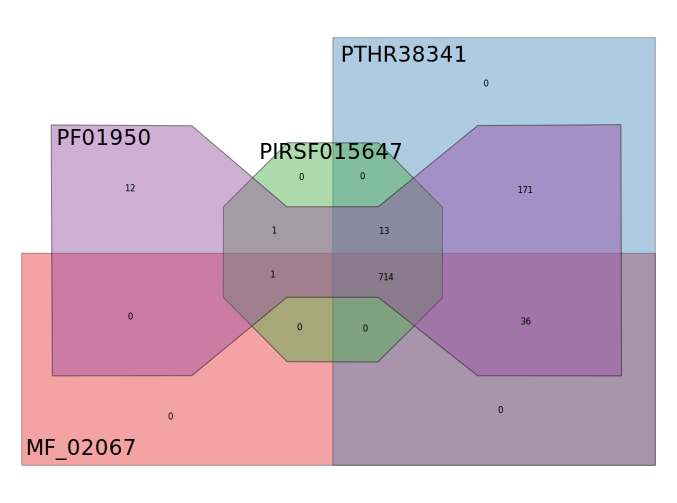

In [23]:
vn

Do some of the 41 entries contain the same PubMed IDs? Let's find the 5 most common ones.

In [24]:
from collections import Counter

In [25]:
c = Counter()
for e in entries:
    c.update(e.all_pubmed_ids)
print(c.most_common(5))

[('15489334', 24), ('20068231', 9), ('14702039', 8), ('23186163', 8), ('21269460', 7)]


Which are the accession numbers and species of those 24 entries containing the most common one (15489334)?

In [26]:
for e in entries:
    if '15489334' in e.all_pubmed_ids:
        print(e.primary_accession, e.organism)

Q06507 Mus musculus (Mouse).
P18848 Homo sapiens (Human).
Q9Y6D9 Homo sapiens (Human).
P47911 Mus musculus (Mouse).
Q0VGT2 Mus musculus (Mouse).
O14908 Homo sapiens (Human).
Q02878 Homo sapiens (Human).
O14910 Homo sapiens (Human).
Q10586 Homo sapiens (Human).
Q61330 Mus musculus (Mouse).
P43489 Homo sapiens (Human).
Q08AM6 Homo sapiens (Human).
P23510 Homo sapiens (Human).
Q86VP1 Homo sapiens (Human).
O35426 Mus musculus (Mouse).
P17861 Homo sapiens (Human).
Q9DBG9 Mus musculus (Mouse).
Q4QQV1 Rattus norvegicus (Rat).
O14907 Homo sapiens (Human).
Q66HA4 Rattus norvegicus (Rat).
Q9UQ35 Homo sapiens (Human).
Q13884 Homo sapiens (Human).
Q3UKC1 Mus musculus (Mouse).
Q9NPB6 Homo sapiens (Human).


So, which paper is hiding behind this PMID 15489334? Here we use another module from prunito.

In [27]:
from prunito import europepmc as epmc

In [28]:
paper = epmc.get_pmid_metadata('15489334')

EuropePMC returns data for example in JSON format. We can iterate over results.

In [29]:
# paper.json()['resultList']['result'][0]['title']
for p in paper:
    print(p['title'])

The status, quality, and expansion of the NIH full-length cDNA project: the Mammalian Gene Collection (MGC).


In [30]:
list(paper)[0]['abstractText']

"The National Institutes of Health's Mammalian Gene Collection (MGC) project was designed to generate and sequence a publicly accessible cDNA resource containing a complete open reading frame (ORF) for every human and mouse gene. The project initially used a random strategy to select clones from a large number of cDNA libraries from diverse tissues. Candidate clones were chosen based on 5'-EST sequences, and then fully sequenced to high accuracy and analyzed by algorithms developed for this project. Currently, more than 11,000 human and 10,000 mouse genes are represented in MGC by at least one clone with a full ORF. The random selection approach is now reaching a saturation point, and a transition to protocols targeted at the missing transcripts is now required to complete the mouse and human collections. Comparison of the sequence of the MGC clones to reference genome sequences reveals that most cDNA clones are of very high sequence quality, although it is likely that some cDNAs may c

As the paper mentions the Mammalian Gene Collection, why not search EuropePMC for articles mentioning the collection in their abstracts?

In [31]:
mgc_papers = epmc.search('abstract:"Mammalian Gene Collection"')

In [32]:
mgc_papers.size()
#
# len(mgc_papers)

24

In [33]:
for idx, hit in enumerate(mgc_papers):
    print(idx, hit['title'])

0 Identification of candidate transcription factor binding sites in the cattle genome.
1 Selenoproteins in bladder cancer.
2 NSrp70 is a novel nuclear speckle-related protein that modulates alternative pre-mRNA splicing in vivo.
3 Generation of a genome scale lentiviral vector library for EF1α promoter-driven expression of human ORFs and identification of human genes affecting viral titer.
4 The completion of the Mammalian Gene Collection (MGC).
5 A high-throughput platform for lentiviral overexpression screening of the human ORFeome.
6 PRFdb: a database of computationally predicted eukaryotic programmed -1 ribosomal frameshift signals.
7 Transcriptome analysis of a cDNA library from adult human epididymis.
8 Construction and characterization of a normalized yeast two-hybrid library derived from a human protein-coding clone collection.
9 Evaluation of vector-primed cDNA library production from microgram quantities of total RNA.
10 Concatenation cDNA sequencing for transcriptome analysi

Each hit/paper has many extra data fields including DOI, PubMed ID etc. If the abstract is needed, resulttype='core' has to be specified as a search parameter.

In [34]:
for k, v in list(mgc_papers)[3].items():
    print(k + ':\t' + str(v))

id:	23251614
source:	MED
pmid:	23251614
pmcid:	PMC3520899
doi:	10.1371/journal.pone.0051733
title:	Generation of a genome scale lentiviral vector library for EF1α promoter-driven expression of human ORFs and identification of human genes affecting viral titer.
authorString:	Škalamera D, Dahmer M, Purdon AS, Wilson BM, Ranall MV, Blumenthal A, Gabrielli B, Gonda TJ.
journalTitle:	PLoS One
issue:	12
journalVolume:	7
pubYear:	2012
journalIssn:	1932-6203
pageInfo:	e51733
pubType:	research support, non-u.s. gov't; research-article; journal article; 
isOpenAccess:	Y
inEPMC:	Y
inPMC:	Y
hasPDF:	Y
hasBook:	N
hasSuppl:	Y
citedByCount:	8
hasReferences:	Y
hasTextMinedTerms:	Y
hasDbCrossReferences:	Y
dbCrossReferenceList:	{'dbName': ['EMBL']}
hasLabsLinks:	Y
hasTMAccessionNumbers:	Y
tmAccessionTypeList:	{'accessionType': ['gen']}
firstPublicationDate:	2012-12-12
